# Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


# Load Data

In [22]:
# Load the dataset
df = pd.read_csv('../data/digEds_cat.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Shape: 351 rows × 52 columns
Memory usage: 1.02 MB


# Basic Information

In [23]:
# Basic information
print("="*80)
print("DATASET INFO")
print("="*80)
df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   id                                               351 non-null    int64 
 1   Historical Period                                351 non-null    object
 2   Time/Century                                     351 non-null    object
 3   Edition name                                     351 non-null    object
 4   URL                                              351 non-null    object
 5   Scholarly                                        351 non-null    object
 6   Digital                                          351 non-null    object
 7   Edition                                          351 non-null    object
 8   Language                                         351 non-null    object
 9   Writing support               

#View First Rows

In [24]:
# First few rows
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,id,Historical Period,Time/Century,Edition name,URL,Scholarly,Digital,Edition,Language,Writing support,Begin date,End date,Manager or Editor,Institution(s),Audience,Philological statement,Account of textual variance,Value of witnesses,XML-TEI Transcription,XML(-TEI) available to download,Images,Zoom images,"Image manipulation (brightness, rotation, etc.)",Text-Image Linking,Source Text Translation,Website language,Glossary,Indices,String matching,Advanced search,Creative Commons License,Open source/Open access,Linked Open Data,API,Crowdsourcing,Feedback,Technological statement,Links to ext. resources,OCR or keyed?,Mobile friendly/application,Print-friendly view,Print facsimile (complementary output),Repository of source material(s),Place of origin of source material(s),Sponsor/Funding body,Budget (rough),Infrastructure,Current availability,RIDE review,Sahle Catalog,Citation,Handle-PID
0,1,Middle Ages,8th,Digitale Edition der Handschrift Cod. Guelf. 6...,http://diglib.hab.de/edoc/ed000006/startx.htm,yes,yes,yes,LAT,Codex,2006,2010,Torsten Schaßan,Herzog August Bibliothek Wolfenbüttel,not provided,partly,yes,yes,partly,no,partly,yes,no,no,no,GER,no,no,no,yes,no,yes,no,no,no,no,no,yes,Keyed,no,not provided,not provided,Herzog August Bibliothek Wolfenbüttel,Italy,Gerda Henkel Stiftung,not provided,XML; XSLT,yes,no,yes,not provided,21.11115/0000-000B-D080-8
1,2,Early Modern,18th,The Thomas Gray Archive,http://www.thomasgray.org/,yes,yes,no,ENG; LAT; GRE,Manuscript,2000,present,Alexander Huber,University of Oxford; SUB Göttingen,Scholars,yes,yes,yes,yes,yes,yes,no,no,no,no,ENG,yes,yes,yes,yes,no,Open Access and Open Source (all data),no,no,yes,yes,yes,yes,Keyed,no,no,no,Various,Various,Institutional funding,not provided,HTML5; CSS; jQuery; custom built,yes,no,yes,not provided,21.11115/0000-000B-D081-7
2,3,Middle Ages,14th,A critical edition of the poetry of Dafydd ap ...,http://www.dafyddapgwilym.net/,yes,yes,yes,WEL,Manuscript,2002,2007,Alexander Roberts; Dafydd Johnston,University of Swansea,Students of Celtic Studies,yes,yes,yes,yes,no,yes,yes,no,no,no,WEL; ENG,no,no,no,no,no,yes,no,no,no,yes,no,no,Keyed,no,yes,not provided,Various,"Brogynin, Penrhyn-coch",AHRC,not provided,Javascript; Perl; Xmetal; Microsoft Active Ser...,yes,no,yes,not provided,21.11115/0000-000B-D082-6
3,4,Antiquity,5th,Saint Patrick's Confessio,http://www.confessio.ie/#,yes,yes,yes,LAT,Manuscript; Print,2008,2011,Franz Fischer; Anthony Harvey,Royal Irish Academy,Scholars; general public,yes,partly,partly,yes,yes,yes,yes,no,no,ENG; GER; GLA; ITA; POR,ENG,yes,no,yes,no,yes,Open Access and Open Source (some data),no,no,no,yes,yes,yes,Keyed; OCR,no,no,yes,"Various (Dublin, Paris, Rouen, Arras, Salisbur...",Ireland,Higher Education Authority; European Regional ...,not provided,Drupal,yes,no,yes,not provided,21.11115/0000-000B-D083-5
4,5,Middle Ages; Early Modern,14th-18th,Liber Matriculae - Il libro della matricola de...,http://scrineum.unipv.it/LM/home.html,yes,yes,yes,LAT,Manuscript,2000,not provided,Antonio Olivieri,Università degli Studi di Pavia,not provided,yes,yes,yes,no,no,yes,yes,no,no,no,ITA,no,no,no,no,no,yes,no,no,no,yes,no,no,Keyed,no,not provided,not provided,Archivio Storico Comunale di Vercelli,Vercelli,not provided,not provided,not provided,no,no,yes,not provided,21.11115/0000-000B-D084-4


# Column Type Identification

In [25]:
# Function to identify column type
def identify_column_type(series):
    """Identify if column is dummy, categorical, numeric, or text"""
    
    # Remove missing values for analysis
    series_clean = series.dropna()
    unique_vals = set(series_clean.unique())
    n_unique = len(unique_vals)
    
    # Check if dummy variable (yes/no/partly/not provided)
    dummy_values = {'yes', 'no', 'partly', 'not provided', ''}
    if unique_vals.issubset(dummy_values) and n_unique > 0:
        return 'dummy'
    
    # Check if numeric
    if pd.api.types.is_numeric_dtype(series):
        return 'numeric'
    
    # Check if categorical (few unique values)
    if n_unique <= 20 and n_unique > 0:
        return 'categorical'
    
    # Check if year/date
    if series_clean.astype(str).str.match(r'^\d{4}$').any():
        return 'year/date'
    
    # Otherwise it's text
    return 'text'

print("✓ Function defined")

# Analyze all columns
column_analysis = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Identified_Type': [identify_column_type(df[col]) for col in df.columns],
    'Unique_Values': df.nunique(),
    'Missing_Count': df.isna().sum(),
    'Missing_Pct': (df.isna().sum() / len(df) * 100).round(1),
    'Sample_Values': [df[col].dropna().unique()[:3].tolist() if len(df[col].dropna()) > 0 else [] 
                      for col in df.columns]
})

print("\n" + "="*80)
print("COMPLETE COLUMN ANALYSIS")
print("="*80)
column_analysis

✓ Function defined

COMPLETE COLUMN ANALYSIS


,Column,Data_Type,Identified_Type,Unique_Values,Missing_Count,Missing_Pct,Sample_Values
id,id,int64,numeric,351,0,0.0,"[1, 2, 3]"
Historical Period,Historical Period,object,categorical,14,0,0.0,"[Middle Ages, Early Modern, Antiquity]"
Time/Century,Time/Century,object,year/date,289,0,0.0,"[8th, 18th, 14th]"
Edition name,Edition name,object,text,350,0,0.0,[Digitale Edition der Handschrift Cod. Guelf. ...
URL,URL,object,text,351,0,0.0,[http://diglib.hab.de/edoc/ed000006/startx.htm...
Scholarly,Scholarly,object,dummy,2,0,0.0,"[yes, no]"
Digital,Digital,object,dummy,2,0,0.0,"[yes, no]"
Edition,Edition,object,dummy,3,0,0.0,"[yes, no, not provided]"
Language,Language,object,text,78,0,0.0,"[LAT, ENG; LAT; GRE, WEL]"
Writing support,Writing support,object,text,92,0,0.0,"[Codex, Manuscript, Manuscript; Print]"


# Summary by Type


Columns by Identified Type:
Identified_Type
dummy          25
text           15
categorical     8
year/date       3
numeric         1
Name: count, dtype: int64


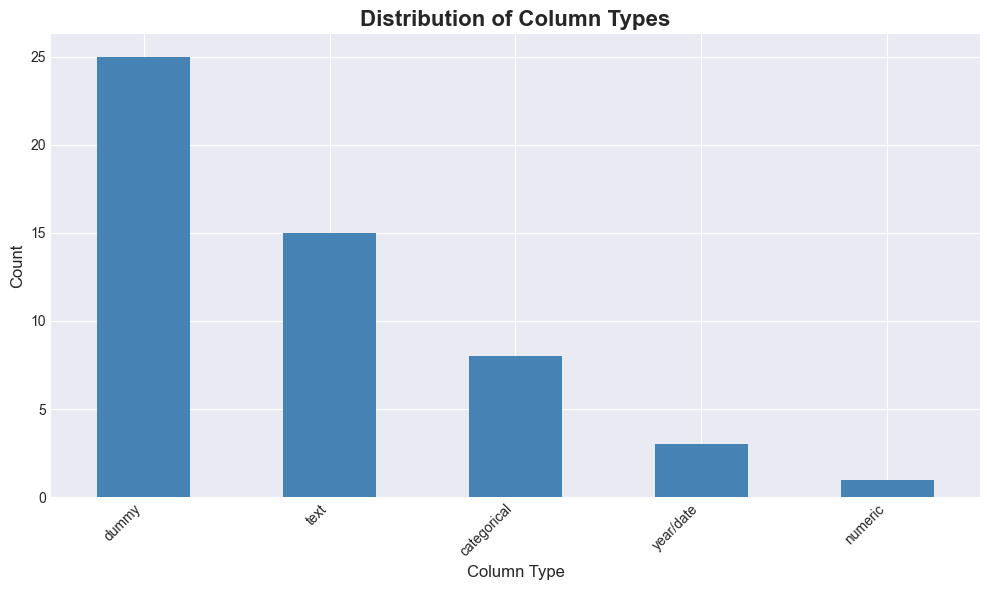

In [26]:
# Summary by type
print("\nColumns by Identified Type:")
print("="*80)
type_summary = column_analysis['Identified_Type'].value_counts()
print(type_summary)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
type_summary.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Distribution of Column Types', fontsize=16, fontweight='bold')
ax.set_xlabel('Column Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# Get all dummy variables
dummy_cols = column_analysis[column_analysis['Identified_Type'] == 'dummy']['Column'].tolist()

print(f"Found {len(dummy_cols)} dummy variables:")
print("="*80)
for col in dummy_cols:
    print(f"  • {col}")

Found 25 dummy variables:
  • Scholarly
  • Digital
  • Edition
  • Philological statement
  • Account of textual variance
  • XML-TEI Transcription
  • XML(-TEI) available to download
  • Images
  • Zoom images
  • Image manipulation (brightness, rotation, etc.)
  • Text-Image Linking
  • Glossary
  • Indices
  • String matching
  • Advanced search
  • Creative Commons License
  • Linked Open Data
  • API
  • Crowdsourcing
  • Feedback
  • Technological statement
  • Links to ext. resources
  • Mobile friendly/application
  • Current availability
  • Citation



Dummy Variable Distributions:

Scholarly:
------------------------------------------------------------
Scholarly
yes    316
no      35
Name: count, dtype: int64

Percentages:
Scholarly
yes    90.0
no     10.0
Name: count, dtype: float64

Digital:
------------------------------------------------------------
Digital
yes    337
no      14
Name: count, dtype: int64

Percentages:
Digital
yes    96.0
no      4.0
Name: count, dtype: float64

Edition:
------------------------------------------------------------
Edition
yes             310
no               40
not provided      1
Name: count, dtype: int64

Percentages:
Edition
yes             88.3
no              11.4
not provided     0.3
Name: count, dtype: float64

Philological statement:
------------------------------------------------------------
Philological statement
yes             203
partly          138
no                7
not provided      3
Name: count, dtype: int64

Percentages:
Philological statement
yes             57.8
partly    

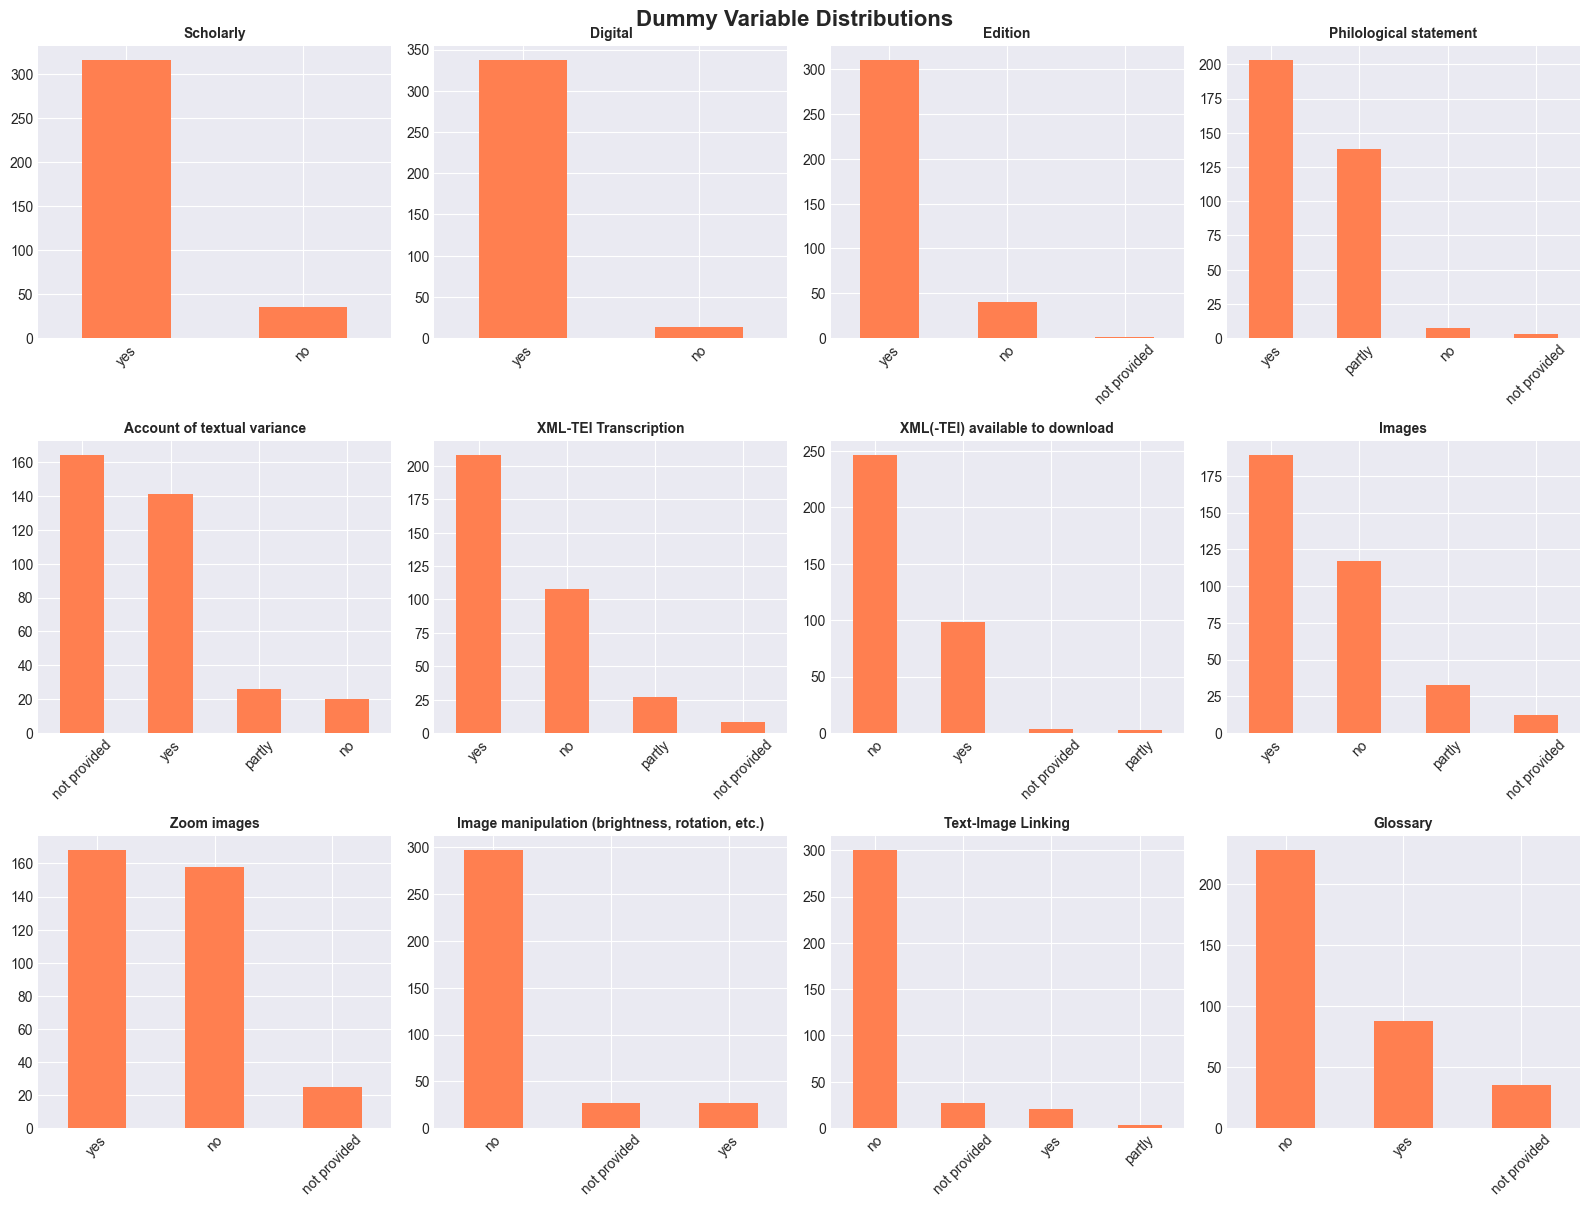

In [28]:
# Analyze each dummy variable
print("\nDummy Variable Distributions:")
print("="*80)

for col in dummy_cols:
    print(f"\n{col}:")
    print("-" * 60)
    counts = df[col].value_counts()
    print(counts)
    print(f"\nPercentages:")
    print((counts / len(df) * 100).round(1))
    
# Visualize dummy variables (first 12)
if len(dummy_cols) > 0:
    n_plots = min(12, len(dummy_cols))
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(dummy_cols[:n_plots]):
        df[col].value_counts().plot(kind='bar', ax=axes[i], color='coral')
        axes[i].set_title(col, fontsize=10, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(n_plots, 12):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Dummy Variable Distributions', fontsize=16, fontweight='bold', y=1.002)
    plt.show()

Found 8 categorical variables:
  • Historical Period (14 unique values)
  • Value of witnesses (5 unique values)
  • Open source/Open access (6 unique values)
  • OCR or keyed? (6 unique values)
  • Print-friendly view (6 unique values)
  • Print facsimile (complementary output) (5 unique values)
  • RIDE review (10 unique values)
  • Sahle Catalog (6 unique values)

Historical Period
Historical Period
Middle Ages                                                    81
Long Nineteenth Century                                        74
Early Modern                                                   70
Antiquity                                                      41
Modern                                                         26
Long Nineteenth Century; Modern                                23
Early Modern; Long Nineteenth Century                          17
Middle Ages; Early Modern                                       6
Modern; Contemporary                                            4


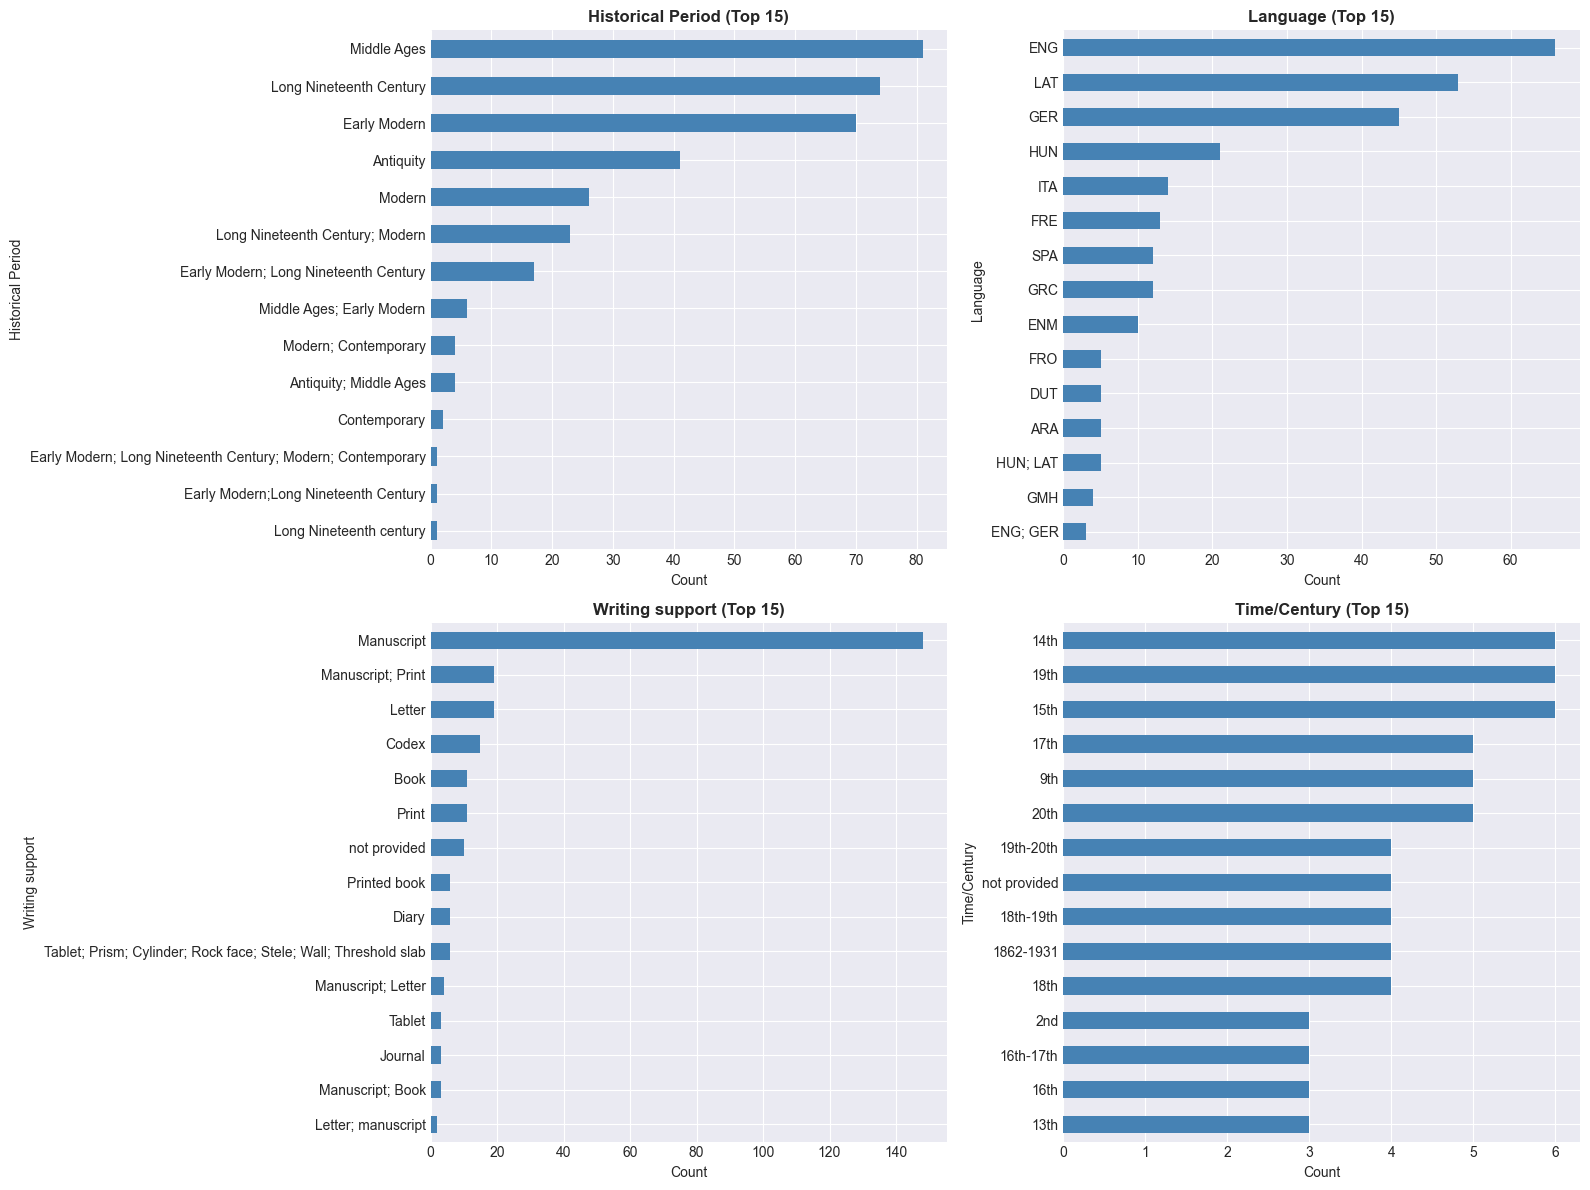

In [29]:
# Get all categorical variables
cat_cols = column_analysis[column_analysis['Identified_Type'] == 'categorical']['Column'].tolist()

print(f"Found {len(cat_cols)} categorical variables:")
print("="*80)
for col in cat_cols:
    n_unique = df[col].nunique()
    print(f"  • {col} ({n_unique} unique values)")
    
# Detailed analysis of key categorical variables
key_categoricals = ['Historical Period', 'Language', 'Writing support', 'Time/Century']
available_cats = [col for col in key_categoricals if col in cat_cols or col in df.columns]

for col in available_cats:
    if col in df.columns:
        print(f"\n{'='*80}")
        print(f"{col}")
        print(f"{'='*80}")
        counts = df[col].value_counts()
        print(counts)
        print(f"\nTop 5 as percentages:")
        print((counts.head() / len(df) * 100).round(1))
        
# Visualize categorical distributions
if len(available_cats) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(available_cats[:4]):
        if col in df.columns:
            top_n = df[col].value_counts().head(15)
            top_n.plot(kind='barh', ax=axes[i], color='steelblue')
            axes[i].set_title(f'{col} (Top 15)', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Count')
            axes[i].invert_yaxis()
    
    # Hide empty subplots
    for i in range(len(available_cats), 4):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [30]:
# Get all text variables
text_cols = column_analysis[column_analysis['Identified_Type'] == 'text']['Column'].tolist()

print(f"Found {len(text_cols)} text/string variables:")
print("="*80)
for col in text_cols:
    n_unique = df[col].nunique()
    avg_length = df[col].dropna().astype(str).str.len().mean()
    print(f"  • {col}")
    print(f"    - {n_unique} unique values")
    print(f"    - Average length: {avg_length:.1f} characters")
    print()

Found 15 text/string variables:
  • Edition name
    - 350 unique values
    - Average length: 38.6 characters

  • URL
    - 351 unique values
    - Average length: 40.6 characters

  • Language
    - 78 unique values
    - Average length: 5.2 characters

  • Writing support
    - 92 unique values
    - Average length: 14.3 characters

  • Manager or Editor
    - 284 unique values
    - Average length: 20.4 characters

  • Institution(s)
    - 224 unique values
    - Average length: 50.5 characters

  • Audience
    - 59 unique values
    - Average length: 21.4 characters

  • Source Text Translation
    - 21 unique values
    - Average length: 3.9 characters

  • Website language
    - 45 unique values
    - Average length: 4.0 characters

  • Repository of source material(s)
    - 166 unique values
    - Average length: 37.4 characters

  • Place of origin of source material(s)
    - 122 unique values
    - Average length: 12.2 characters

  • Sponsor/Funding body
    - 137 unique v

MISSING DATA SUMMARY
Total cells: 18,252
Total missing: 8
Overall missing: 0.04%

Columns with no missing data: 49
Columns with some missing data: 3
Columns with >50% missing: 0

Top 20 Columns by Missing Data:


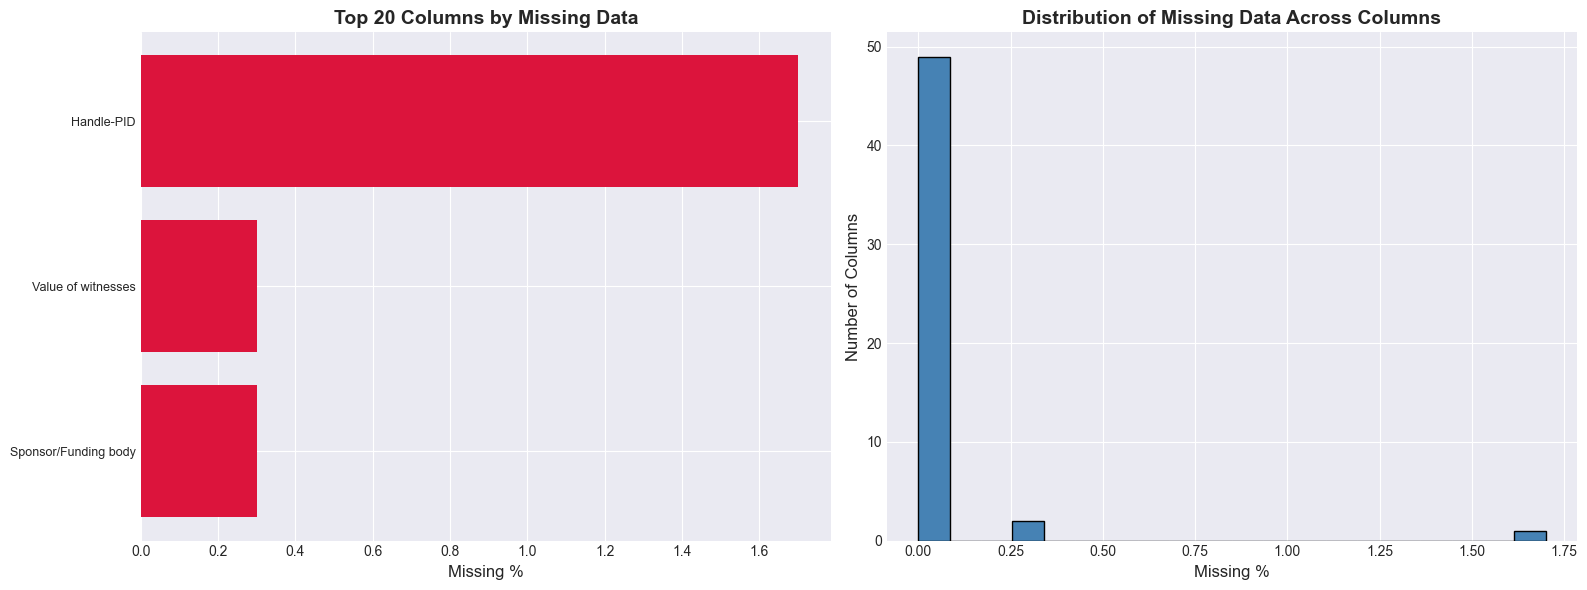

In [31]:
# Overall missing data statistics
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isna().sum().sum()
missing_pct = (total_missing / total_cells * 100)

print("="*80)
print("MISSING DATA SUMMARY")
print("="*80)
print(f"Total cells: {total_cells:,}")
print(f"Total missing: {total_missing:,}")
print(f"Overall missing: {missing_pct:.2f}%")
print(f"\nColumns with no missing data: {(df.isna().sum() == 0).sum()}")
print(f"Columns with some missing data: {(df.isna().sum() > 0).sum()}")
print(f"Columns with >50% missing: {(df.isna().sum() / len(df) > 0.5).sum()}")

# Columns sorted by missing data
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isna().sum(),
    'Missing_Pct': (df.isna().sum() / len(df) * 100).round(1)
}).sort_values('Missing_Pct', ascending=False)

print("\nTop 20 Columns by Missing Data:")
print("="*80)
missing_data.head(20)

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 columns with most missing data
top_missing = missing_data[missing_data['Missing_Pct'] > 0].head(20)
axes[0].barh(range(len(top_missing)), top_missing['Missing_Pct'], color='crimson')
axes[0].set_yticks(range(len(top_missing)))
axes[0].set_yticklabels(top_missing['Column'], fontsize=9)
axes[0].set_xlabel('Missing %', fontsize=12)
axes[0].set_title('Top 20 Columns by Missing Data', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Distribution of missing percentages
axes[1].hist(missing_data['Missing_Pct'], bins=20, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Missing %', fontsize=12)
axes[1].set_ylabel('Number of Columns', fontsize=12)
axes[1].set_title('Distribution of Missing Data Across Columns', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Historical Period Distribution:
Historical Period
Middle Ages                                                    81
Long Nineteenth Century                                        74
Early Modern                                                   70
Antiquity                                                      41
Modern                                                         26
Long Nineteenth Century; Modern                                23
Early Modern; Long Nineteenth Century                          17
Middle Ages; Early Modern                                       6
Modern; Contemporary                                            4
Antiquity; Middle Ages                                          4
Contemporary                                                    2
Early Modern; Long Nineteenth Century; Modern; Contemporary     1
Early Modern;Long Nineteenth Century                            1
Long Nineteenth century                                         1
Name: count, dtype: int64


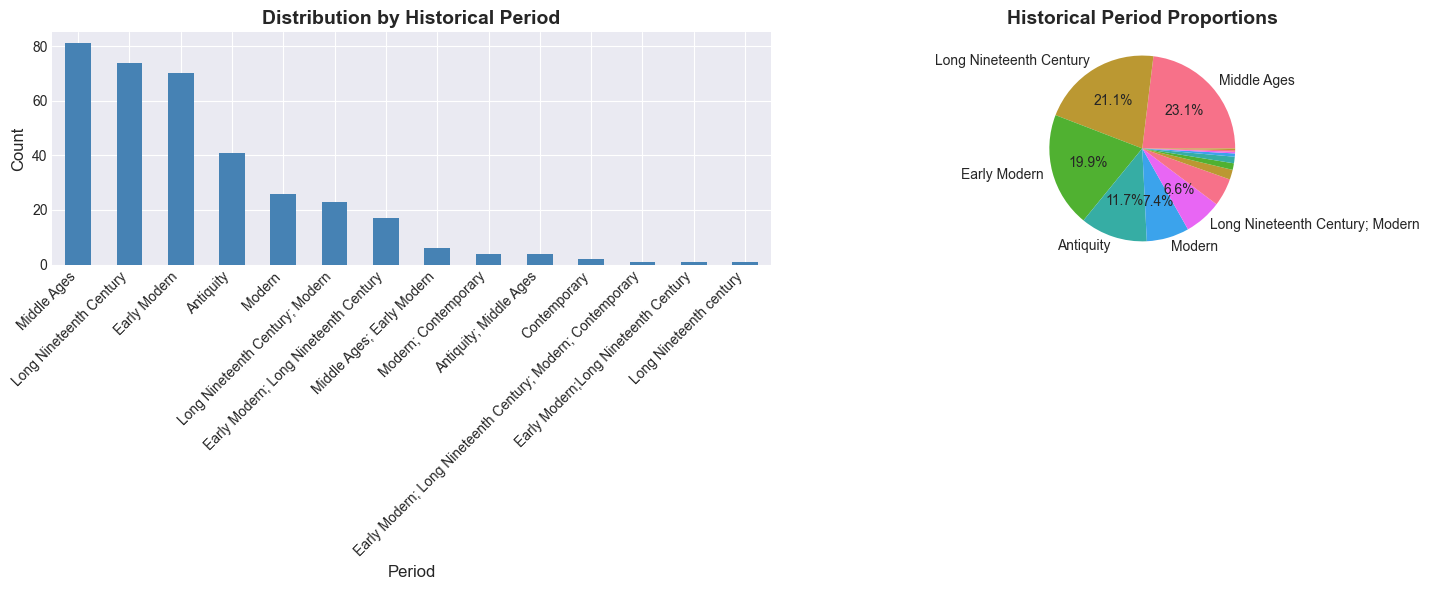

In [32]:
if 'Historical Period' in df.columns:
    print("Historical Period Distribution:")
    print("="*80)
    period_counts = df['Historical Period'].value_counts()
    print(period_counts)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    period_counts.plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Distribution by Historical Period', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Period', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45, labelsize=10)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
    
    # Pie chart
    def autopct_format(pct):
        return f'{pct:.1f}%' if pct > 5 else ''
    
    # Calculate percentages and create custom labels
    percentages = (period_counts / period_counts.sum() * 100)
    labels = [label if pct > 5 else '' for label, pct in zip(period_counts.index, percentages)]
    
    period_counts.plot(kind='pie', ax=axes[1], autopct=autopct_format, labels=labels)
    axes[1].set_title('Historical Period Proportions', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

Language Distribution (Top 20):
LAT    88
ENG    88
GER    67
HUN    35
FRE    27
ITA    24
GRC    22
SPA    21
ENM    11
ARA     8
POL     8
DUT     7
HEB     7
FRO     5
DEU     4
GMH     4
DAN     3
ARC     3
ANG     3
FRA     3
Name: count, dtype: int64


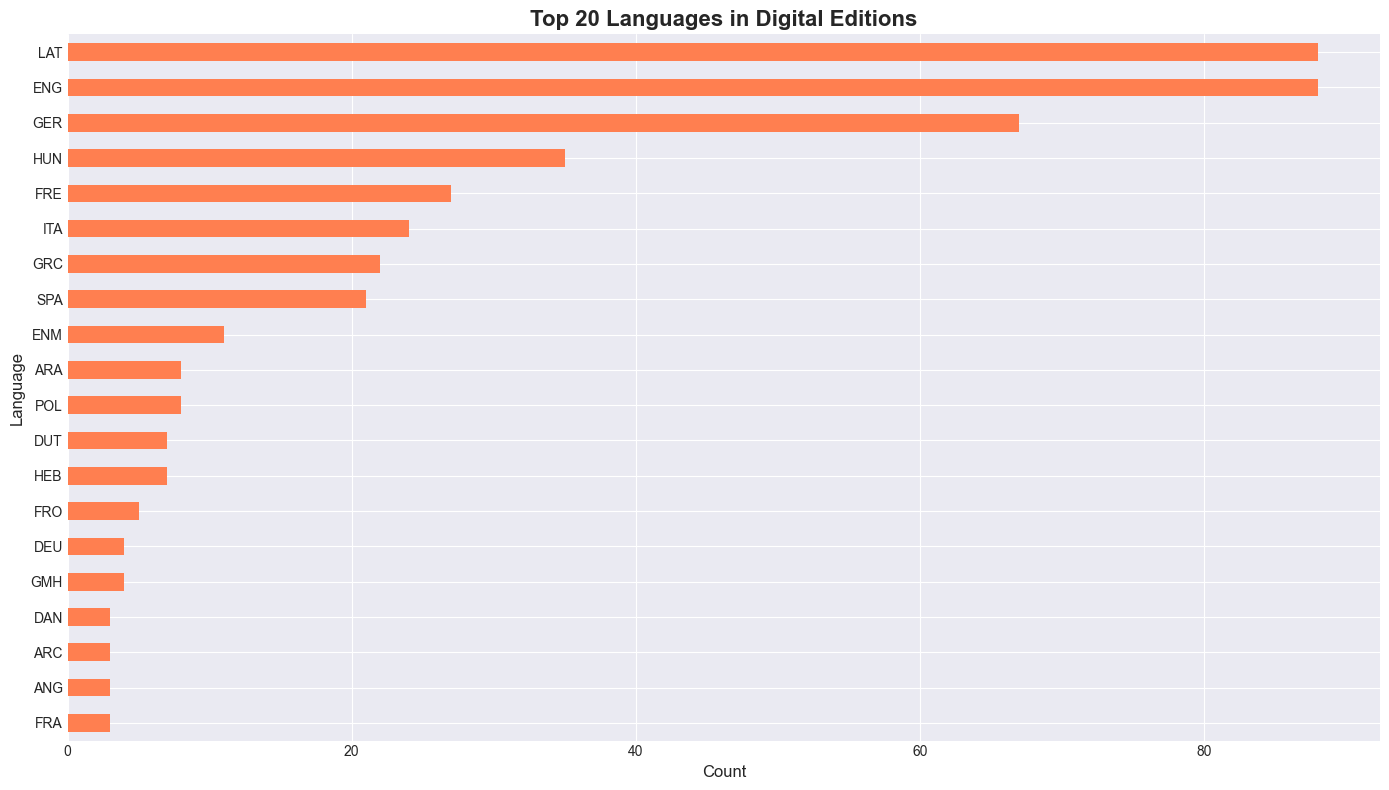

In [33]:
if 'Language' in df.columns:
    print("Language Distribution (Top 20):")
    print("="*80)
    
    # Handle multiple languages (some entries may have multiple languages)
    all_languages = []
    for lang in df['Language'].dropna():
        # Split by semicolon or comma
        langs = str(lang).replace(';', ',').split(',')
        all_languages.extend([l.strip() for l in langs])
    
    lang_counts = pd.Series(all_languages).value_counts()
    print(lang_counts.head(20))
    
    plt.figure(figsize=(14, 8))
    lang_counts.head(20).plot(kind='barh', color='coral')
    plt.title('Top 20 Languages in Digital Editions', fontsize=16, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Language', fontsize=12)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

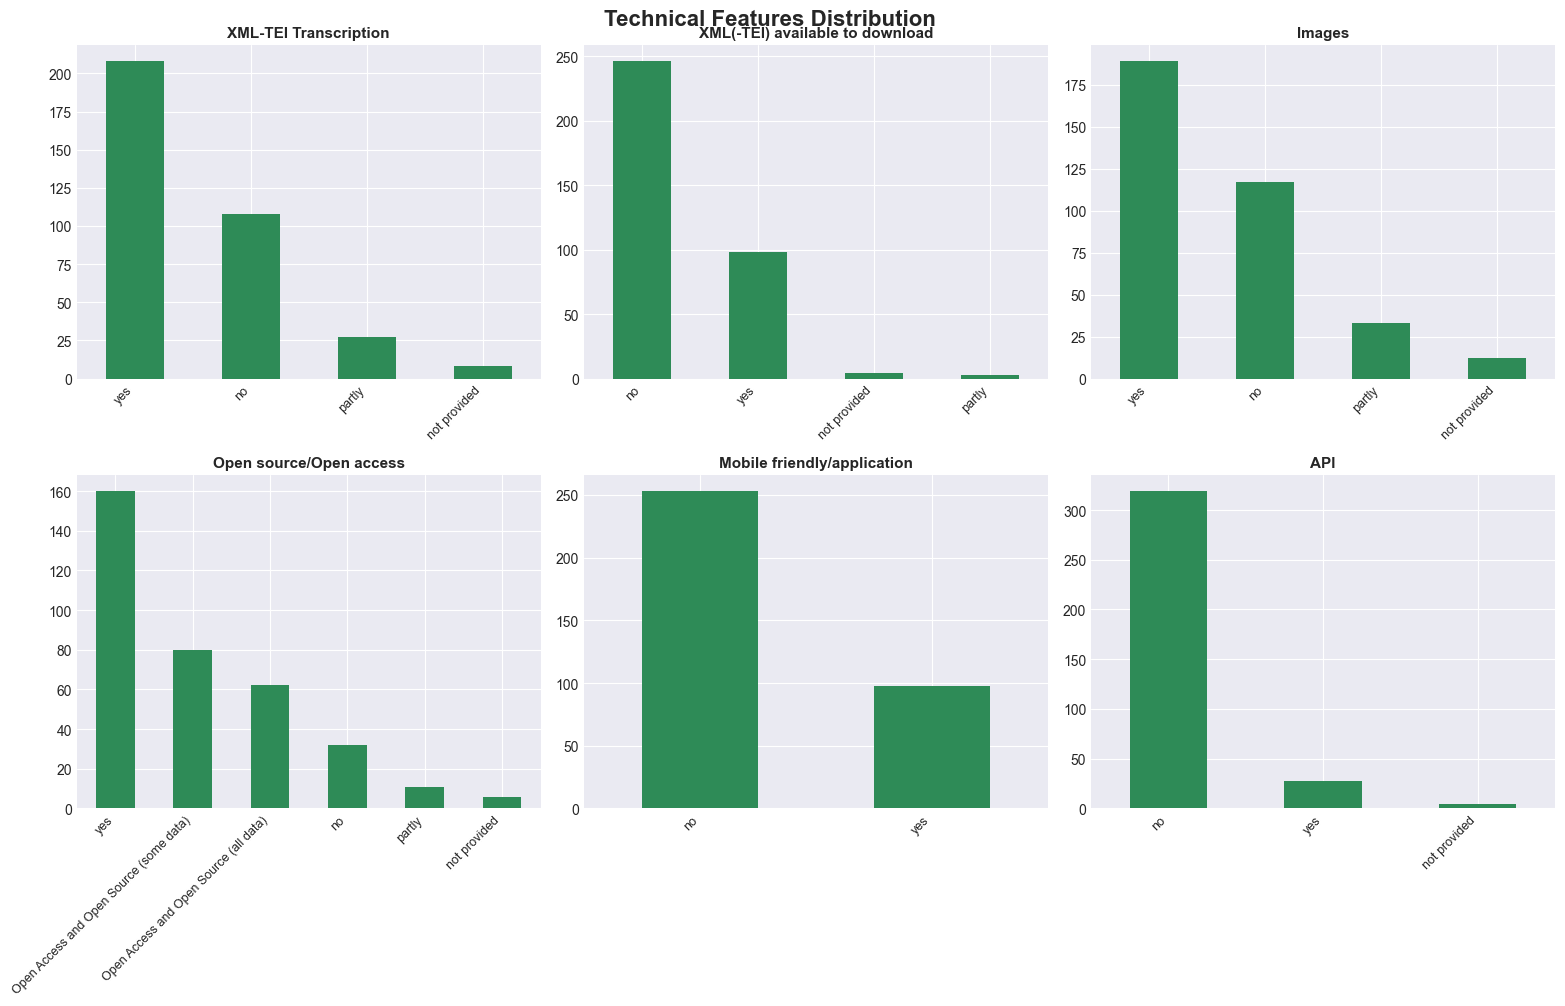

In [34]:
# Key technical features
tech_features = [
    'XML-TEI Transcription',
    'XML(-TEI) available to download',
    'Images',
    'Open source/Open access',
    'Mobile friendly/application',
    'API'
]

available_tech = [col for col in tech_features if col in df.columns]

if len(available_tech) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(available_tech[:6]):
        counts = df[col].value_counts()
        counts.plot(kind='bar', ax=axes[i], color='seagreen')
        axes[i].set_title(col, fontsize=11, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45, labelsize=9)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right')
    
    # Hide empty subplots
    for i in range(len(available_tech), 6):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Technical Features Distribution', fontsize=16, fontweight='bold', y=1.002)
    plt.show()

In [35]:
# Export column analysis
column_analysis.to_csv('column_analysis_summary.csv', index=False)
print("✓ Saved: column_analysis_summary.csv")

# Export missing data analysis
missing_data.to_csv('missing_data_analysis.csv', index=False)
print("✓ Saved: missing_data_analysis.csv")

# Create a summary report
with open('dataset_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write("DIGITAL EDITIONS DATASET - SUMMARY REPORT\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Total Editions: {len(df)}\n")
    f.write(f"Total Columns: {len(df.columns)}\n\n")
    
    f.write("Column Types:\n")
    f.write("-"*40 + "\n")
    for ctype, count in column_analysis['Identified_Type'].value_counts().items():
        f.write(f"  {ctype}: {count}\n")
    
    f.write("\nDummy Variables:\n")
    f.write("-"*40 + "\n")
    for col in dummy_cols:
        f.write(f"  • {col}\n")
    
    f.write("\nMissing Data:\n")
    f.write("-"*40 + "\n")
    f.write(f"  Overall: {missing_pct:.2f}%\n")
    f.write(f"  Columns with >50% missing: {(df.isna().sum() / len(df) > 0.5).sum()}\n")

print("✓ Saved: dataset_summary_report.txt")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

✓ Saved: column_analysis_summary.csv
✓ Saved: missing_data_analysis.csv
✓ Saved: dataset_summary_report.txt

ANALYSIS COMPLETE!


In [36]:
def explore_column(column_name):
    """Quickly explore any column in the dataset"""
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found!")
        return
    
    print(f"\n{'='*80}")
    print(f"EXPLORING: {column_name}")
    print(f"{'='*80}\n")
    
    col_data = df[column_name]
    
    print(f"Data Type: {col_data.dtype}")
    print(f"Total Values: {len(col_data)}")
    print(f"Unique Values: {col_data.nunique()}")
    print(f"Missing: {col_data.isna().sum()} ({col_data.isna().sum()/len(col_data)*100:.1f}%)\n")
    
    if col_data.nunique() <= 30:
        print(f"\nValue Counts:")
        print("-"*60)
        print(col_data.value_counts())
        print(f"\nPercentages:")
        print((col_data.value_counts() / len(col_data) * 100).round(1))
        
        # Visualize
        fig, ax = plt.subplots(figsize=(10, 6))
        col_data.value_counts().plot(kind='barh', ax=ax, color='steelblue')
        ax.set_title(f'Distribution of {column_name}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nTop 20 Values:")
        print("-"*60)
        print(col_data.value_counts().head(20))
        
        # Visualize
        fig, ax = plt.subplots(figsize=(12, 8))
        col_data.value_counts().head(20).plot(kind='barh', ax=ax, color='coral')
        ax.set_title(f'Top 20 Values in {column_name}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Count')
        ax.invert_yaxis()
        plt.tight_layout()
        plt.show()

print("✓ explore_column() function defined")

def compare_columns(col1, col2):
    """Compare two columns (useful for dummy variables)"""
    if col1 not in df.columns or col2 not in df.columns:
        print("One or both columns not found!")
        return
    
    print(f"\n{'='*80}")
    print(f"COMPARING: {col1} vs {col2}")
    print(f"{'='*80}\n")
    
    # Cross-tabulation
    crosstab = pd.crosstab(df[col1], df[col2], margins=True)
    print("Cross-tabulation:")
    print(crosstab)
    
    # Normalized
    print("\n\nNormalized (percentages):")
    crosstab_pct = pd.crosstab(df[col1], df[col2], normalize='all') * 100
    print(crosstab_pct.round(1))
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    pd.crosstab(df[col1], df[col2]).plot(kind='bar', ax=axes[0], stacked=False)
    axes[0].set_title(f'{col1} vs {col2}', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(col1)
    axes[0].set_ylabel('Count')
    axes[0].legend(title=col2)
    axes[0].tick_params(axis='x', rotation=45)
    
    pd.crosstab(df[col1], df[col2]).plot(kind='bar', ax=axes[1], stacked=True)
    axes[1].set_title(f'{col1} vs {col2} (Stacked)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel(col1)
    axes[1].set_ylabel('Count')
    axes[1].legend(title=col2)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

print("✓ compare_columns() function defined")

def search_columns(keyword):
    """Search for columns containing a keyword"""
    keyword = keyword.lower()
    matching = [col for col in df.columns if keyword in col.lower()]
    
    print(f"\nColumns containing '{keyword}':")
    print("="*60)
    if matching:
        for col in matching:
            print(f"  • {col}")
    else:
        print("  No matches found")
    
    return matching

print("✓ search_columns() function defined")



✓ explore_column() function defined
✓ compare_columns() function defined
✓ search_columns() function defined



EXPLORING: Historical Period

Data Type: object
Total Values: 351
Unique Values: 14
Missing: 0 (0.0%)


Value Counts:
------------------------------------------------------------
Historical Period
Middle Ages                                                    81
Long Nineteenth Century                                        74
Early Modern                                                   70
Antiquity                                                      41
Modern                                                         26
Long Nineteenth Century; Modern                                23
Early Modern; Long Nineteenth Century                          17
Middle Ages; Early Modern                                       6
Modern; Contemporary                                            4
Antiquity; Middle Ages                                          4
Contemporary                                                    2
Early Modern; Long Nineteenth Century; Modern; Contemporary     1
Early Mode

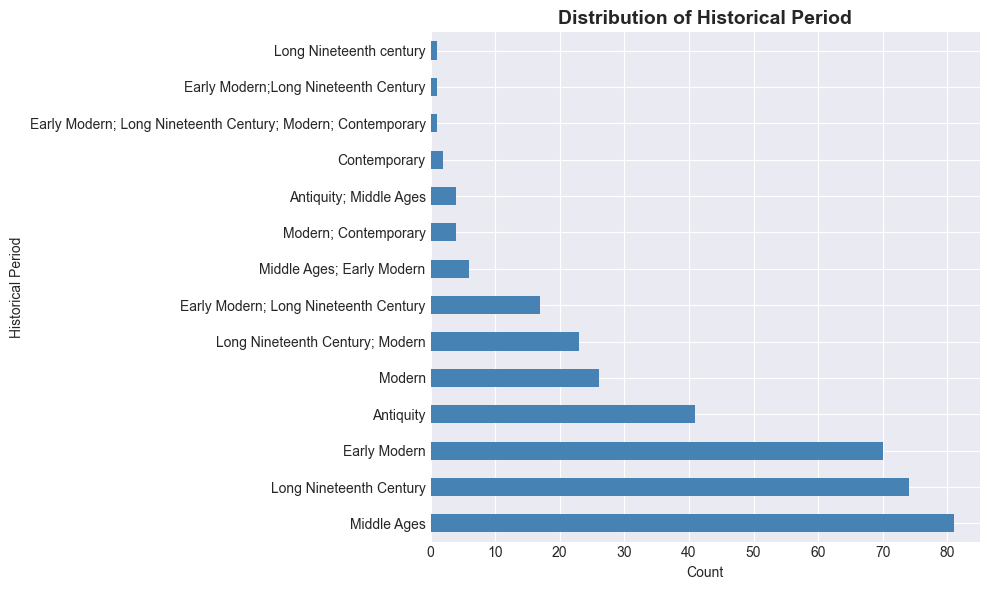

In [37]:
explore_column('Historical Period')


COMPARING: Scholarly vs Open source/Open access

Cross-tabulation:
Open source/Open access  Open Access and Open Source (all data)  \
Scholarly                                                         
no                                                            5   
yes                                                          57   
All                                                          62   

Open source/Open access  Open Access and Open Source (some data)  no  \
Scholarly                                                              
no                                                             5   2   
yes                                                           75  30   
All                                                           80  32   

Open source/Open access  not provided  partly  yes  All  
Scholarly                                                
no                                  2       0   21   35  
yes                                 4      11  139  316  
All

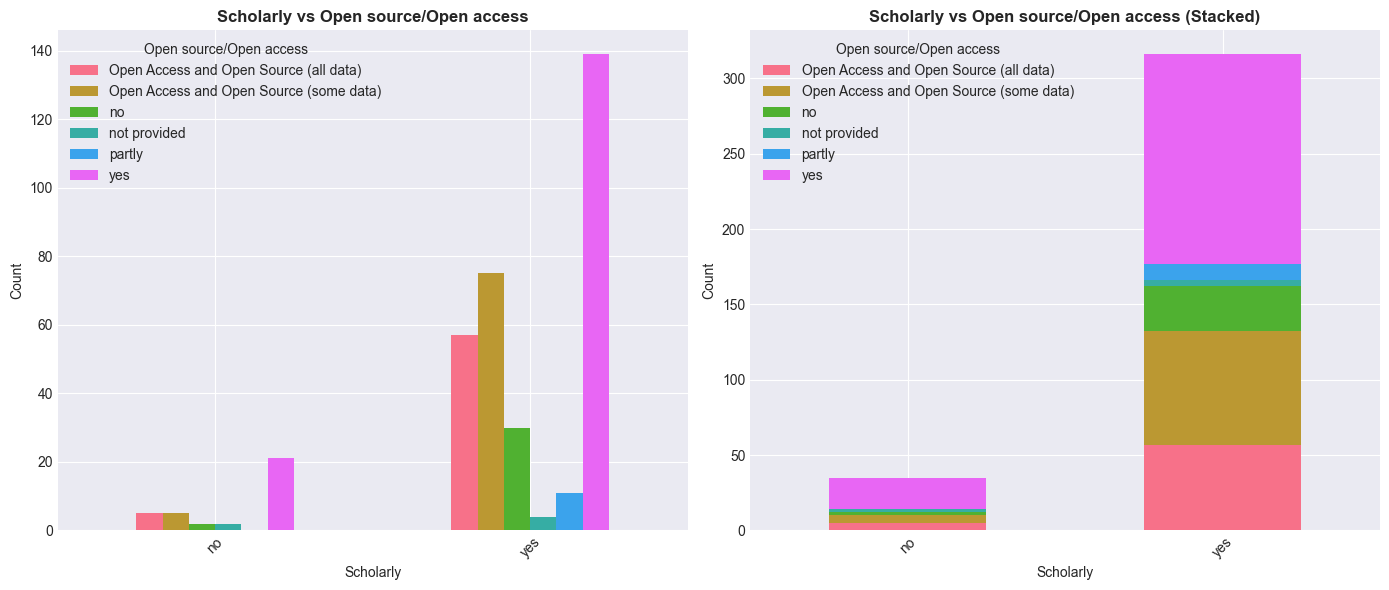

In [38]:
compare_columns('Scholarly', 'Open source/Open access')

In [39]:
search_columns('xml')


Columns containing 'xml':
  • XML-TEI Transcription
  • XML(-TEI) available to download


['XML-TEI Transcription', 'XML(-TEI) available to download']